In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd
import os

In [ ]:
os.chdir('/content/sample_data/')
df = pd.read_excel("NiTPHLeXVideoStreaming.xlsx")
df.head()

,user_location_type,peak_hour_flag,concurrent_users,buffer_events_per_session,mobile_error_rate(proportion),video_load_time(seconds),subtitle_accuracy_score(0-1),average_viewing_time(hours),churn_flag,server_cost(in USD),content_engagement_score(0-100)
0,urban,True,2173,3,0.04,6.09,0.93,0.29,Yes,402.79,75.55
1,rural,False,859,2,0.07,6.76,0.96,0.88,No,280.01,75.82
2,rural,False,207,2,0.09,5.15,0.95,1.55,No,235.06,76.42
3,urban,False,228,2,0.03,4.21,0.97,0.47,Yes,234.12,77.30
4,urban,True,1295,0,0.04,7.24,0.96,1.64,No,409.14,75.58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_location_type               3487 non-null   object 
 1   peak_hour_flag                   3487 non-null   bool   
 2   concurrent_users                 3487 non-null   int64  
 3   buffer_events_per_session        3487 non-null   int64  
 4   mobile_error_rate(proportion)    3487 non-null   float64
 5   video_load_time(seconds)         3487 non-null   float64
 6   subtitle_accuracy_score(0-1)     3487 non-null   float64
 7   average_viewing_time(hours)      3487 non-null   float64
 8   churn_flag                       3487 non-null   object 
 9   server_cost(in USD)              3487 non-null   float64
 10  content_engagement_score(0-100)  3487 non-null   float64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 276.0+ KB


In [ ]:
desc = df.describe()
desc.T

,count,mean,std,min,25%,50%,75%,max
concurrent_users,3487.0,897.733295,663.502054,200.00,450.500,702.00,965.000,2997.00
buffer_events_per_session,3487.0,1.299685,1.291198,0.00,0.000,1.00,2.000,9.00
mobile_error_rate(proportion),3487.0,0.061170,0.033716,0.01,0.030,0.06,0.080,0.15
video_load_time(seconds),3487.0,6.016496,1.927822,0.14,4.665,5.97,7.305,13.66
subtitle_accuracy_score(0-1),3487.0,0.930347,0.071291,0.49,0.930,0.95,0.960,1.03
average_viewing_time(hours),3487.0,1.052919,0.512704,0.10,0.680,1.05,1.410,2.98
server_cost(in USD),3487.0,320.718514,65.615514,122.83,274.475,314.39,363.080,573.89
content_engagement_score(0-100),3487.0,75.598641,1.713647,65.72,75.065,75.88,76.645,79.60


# Desriptive Analysis:

The descriptive statistics provide an overview of the distribution and central tendencies of each variable across 3,487 observations.

* Concurrent Users:The data exhibits high variability and appears to be right-skewed, suggesting that while typical traffic levels are moderate, the system occasionally experiences spikes in user load.
* Buffer Events per Session: The mean value indicates an average of approximately 1.3 buffer events per session. The strong right skew implies that most sessions experience 0–2 buffering events, while a smaller number encounter significantly more, which may negatively affect user satisfaction.
* Mobile Error Rate: The average mobile error rate is 6.1%, which is generally manageable. However, the observed maximum of 15% indicates that under certain conditions, mobile performance can degrade substantially.
* Video Load Times: The mean video load time is around 6 seconds, which is relatively slow and may contribute to reduced user satisfaction or increased abandonment rates.
* Subtitle Accuracy Score: With an average score of 0.93 and a low standard deviation, subtitle accuracy is consistently high across sessions, indicating strong performance in this area.
* Average Viewing Time: The mean viewing duration of approximately 1.05 hours reflects a solid level of user engagement with the content.
* Server Cost: The average server cost per session is $321, with values ranging from $122.83 to $573.89. This wide cost spread likely reflects fluctuations in resource usage driven by varying numbers of concurrent users.
* Content Engagement Score: Content demonstrates strong engagement performance, with an average score of 75.6, indicating that users generally find the content compelling.


--- Variable: concurrent_users ---
  Anderson-Darling Statistic : 245.0672
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


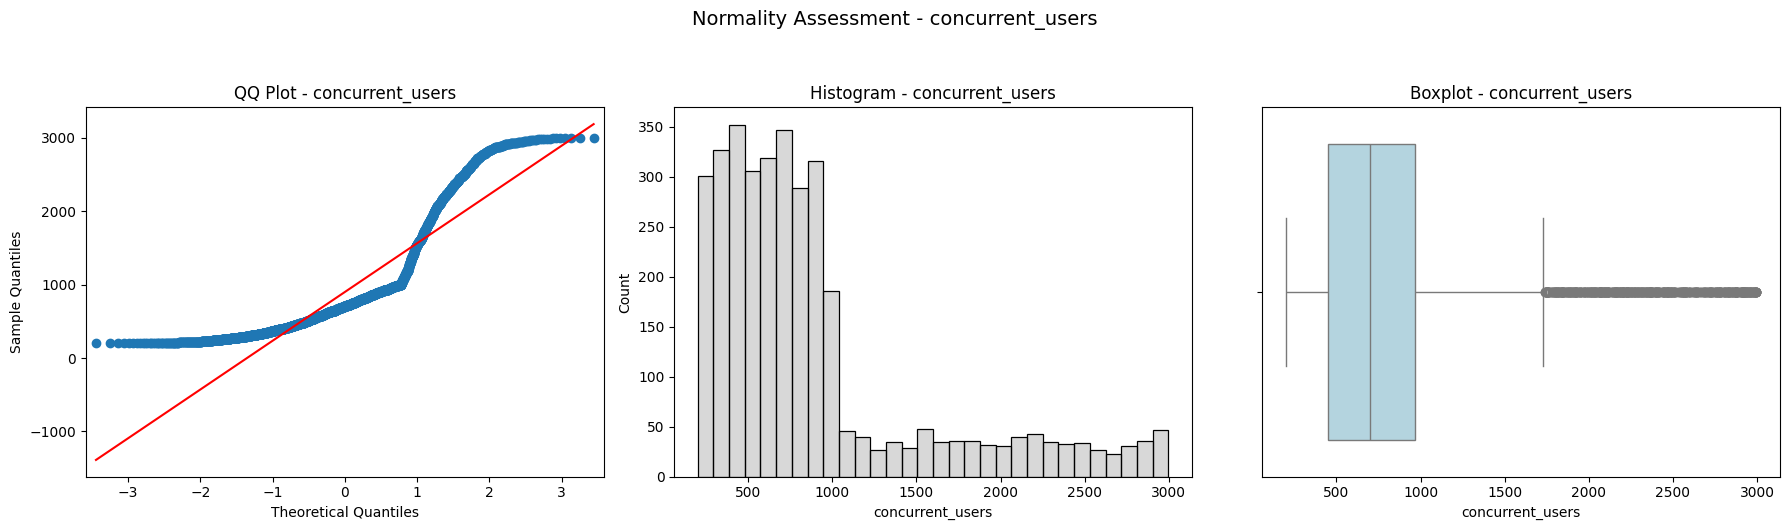


--- Variable: buffer_events_per_session ---
  Anderson-Darling Statistic : 170.2362
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


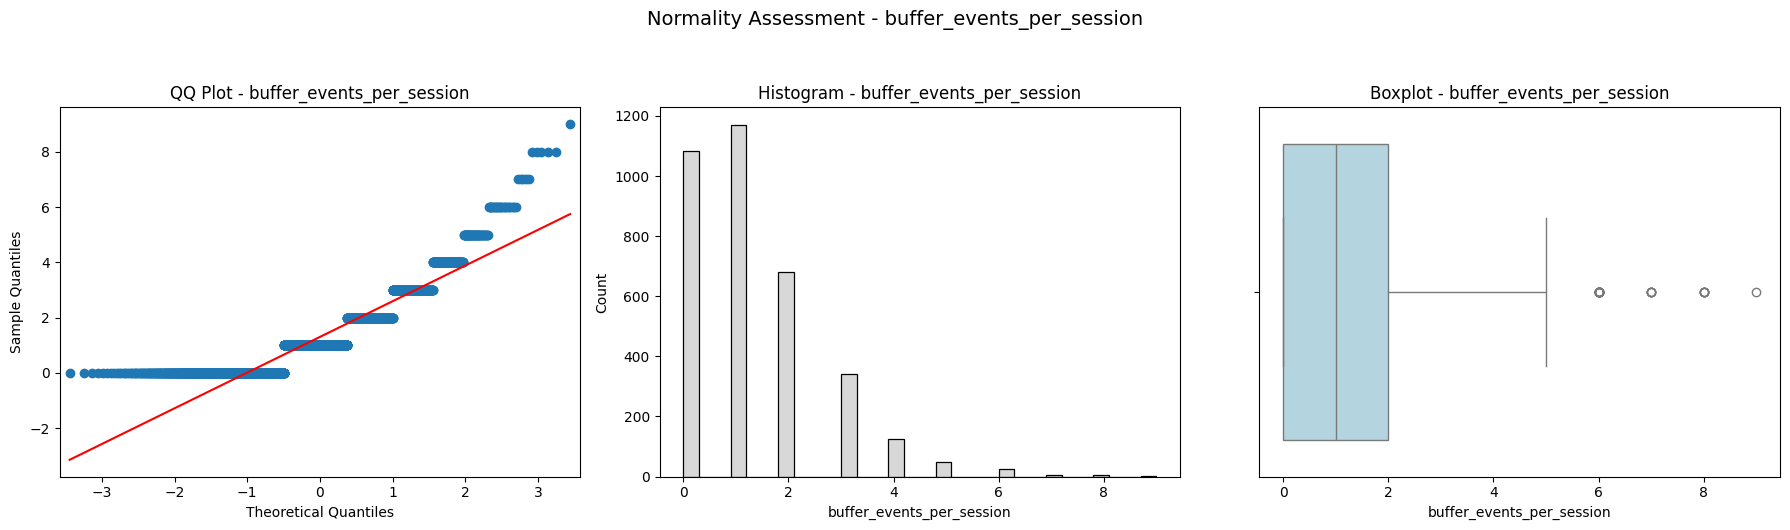


--- Variable: mobile_error_rate(proportion) ---
  Anderson-Darling Statistic : 55.7321
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


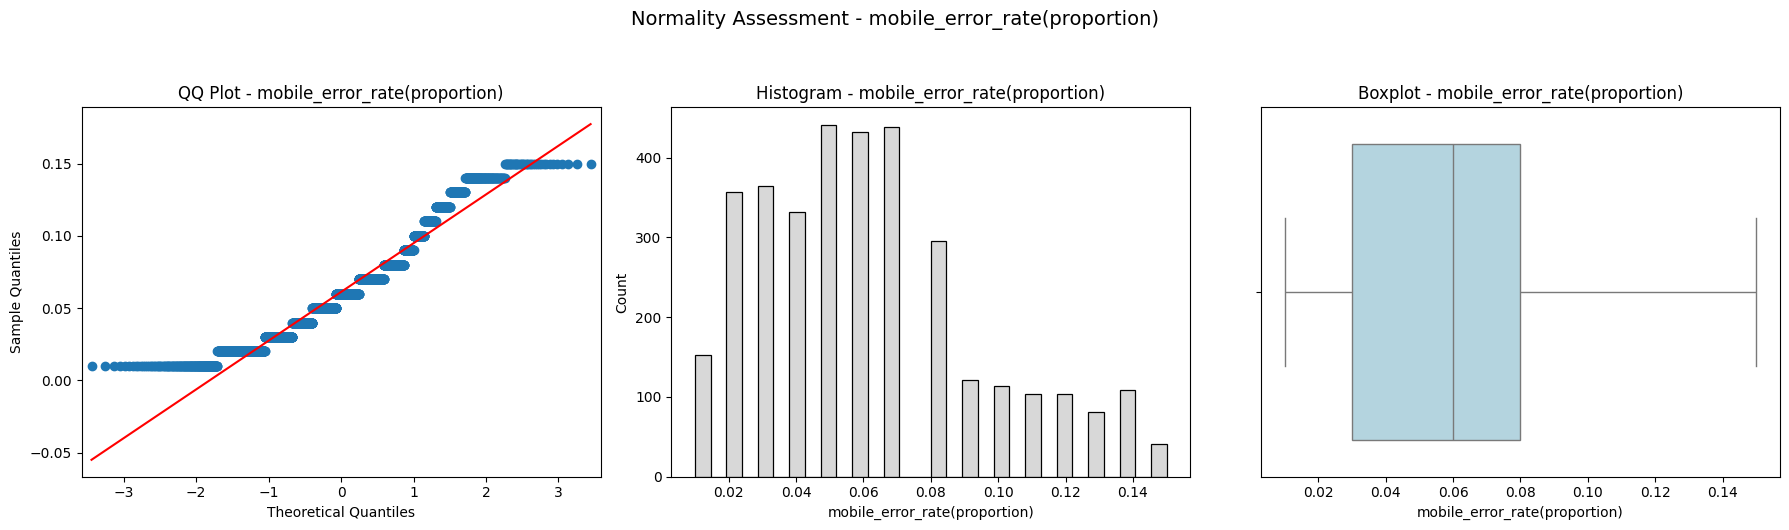


--- Variable: video_load_time(seconds) ---
  Anderson-Darling Statistic : 2.4418
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


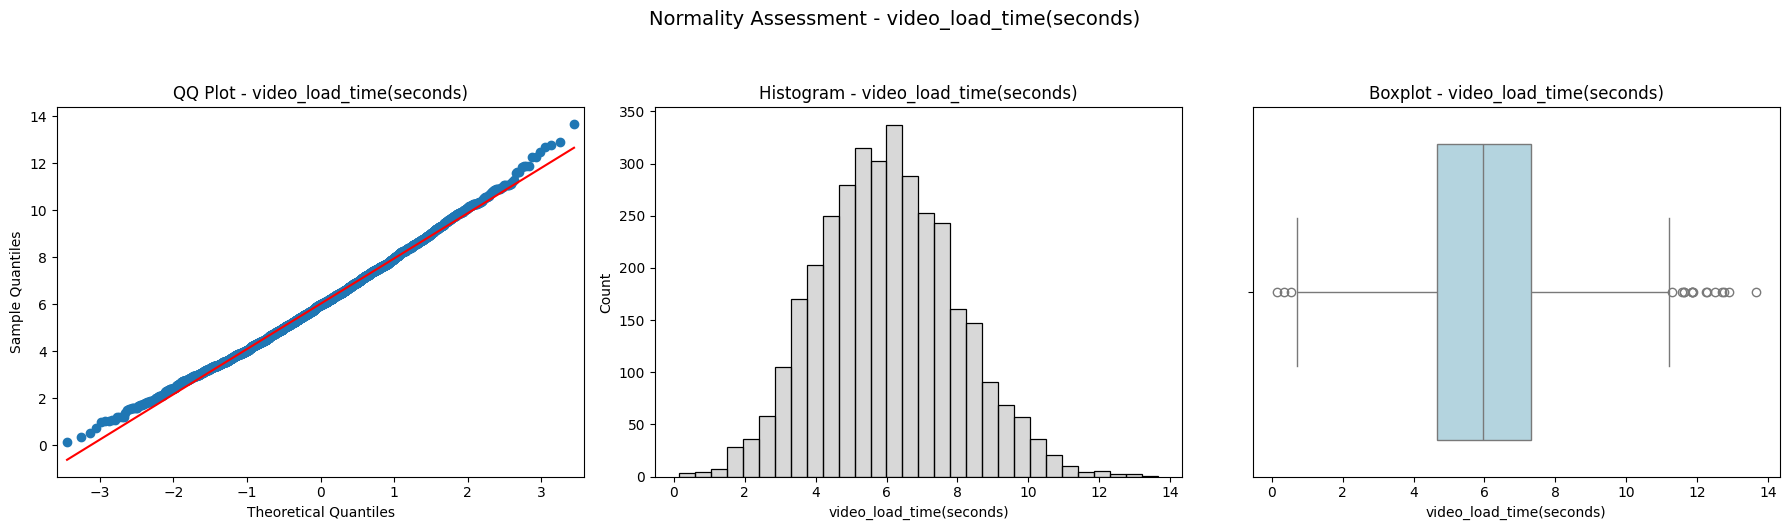


--- Variable: subtitle_accuracy_score(0-1) ---
  Anderson-Darling Statistic : 499.5729
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


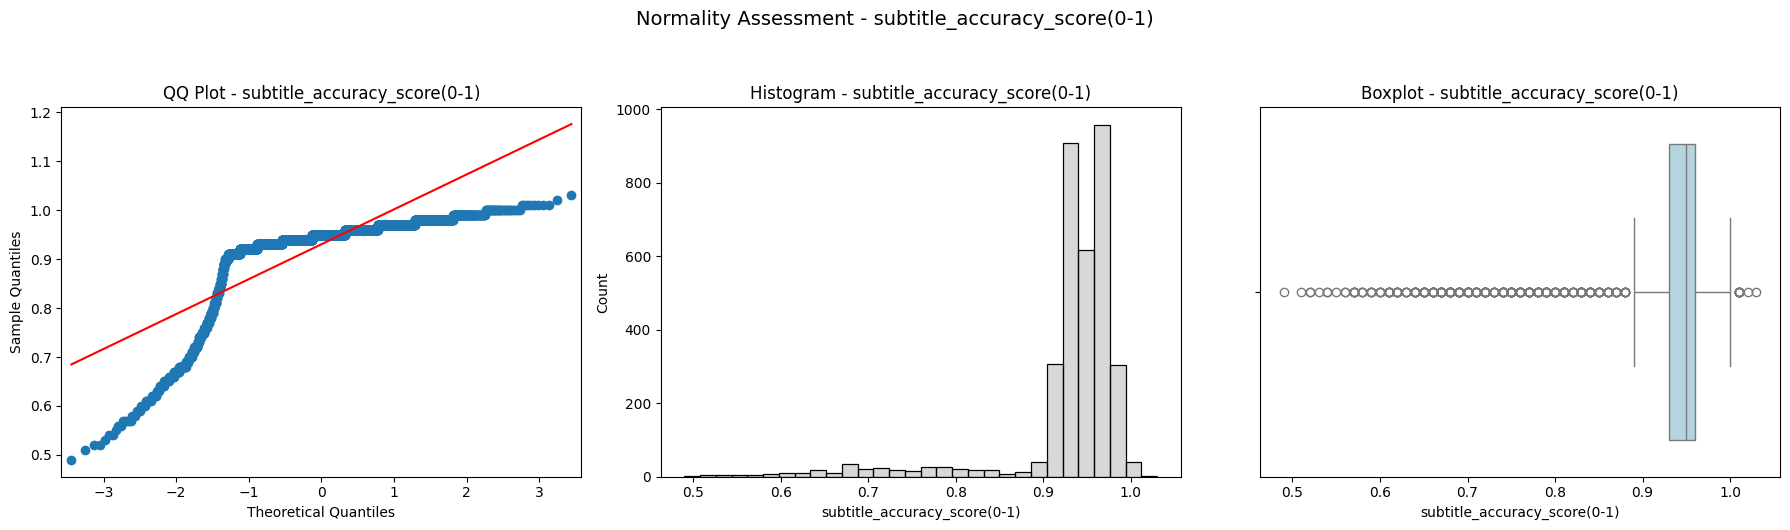


--- Variable: average_viewing_time(hours) ---
  Anderson-Darling Statistic : 3.6366
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


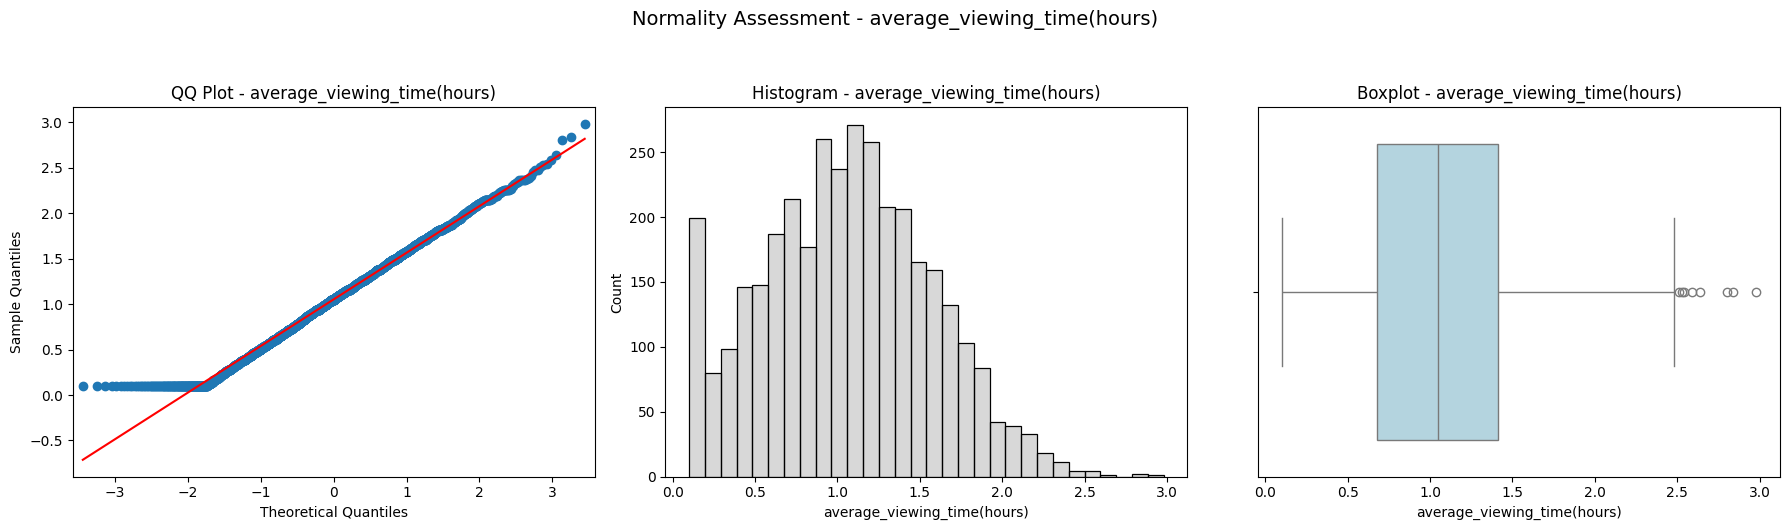


--- Variable: server_cost(in USD) ---
  Anderson-Darling Statistic : 9.1121
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


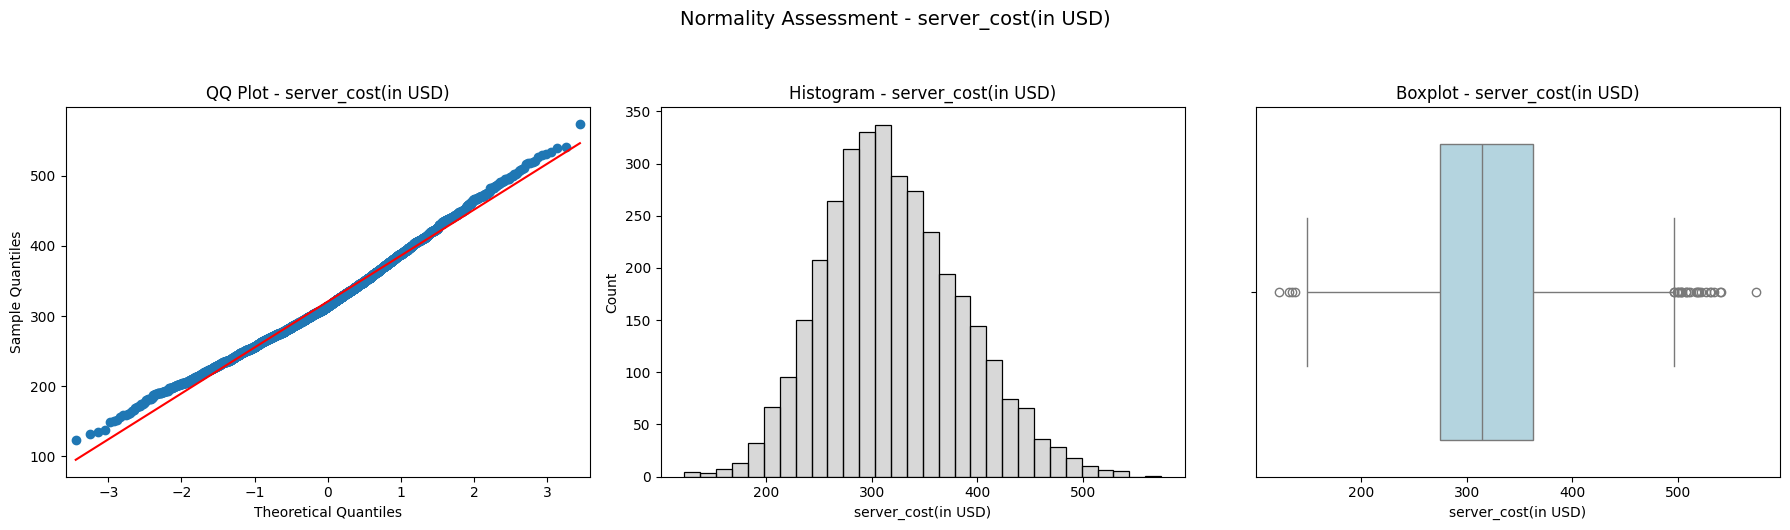


--- Variable: content_engagement_score(0-100) ---
  Anderson-Darling Statistic : 122.2160
  Critical Value (@ 5.0%) : 0.7860
  Decision : Reject Null


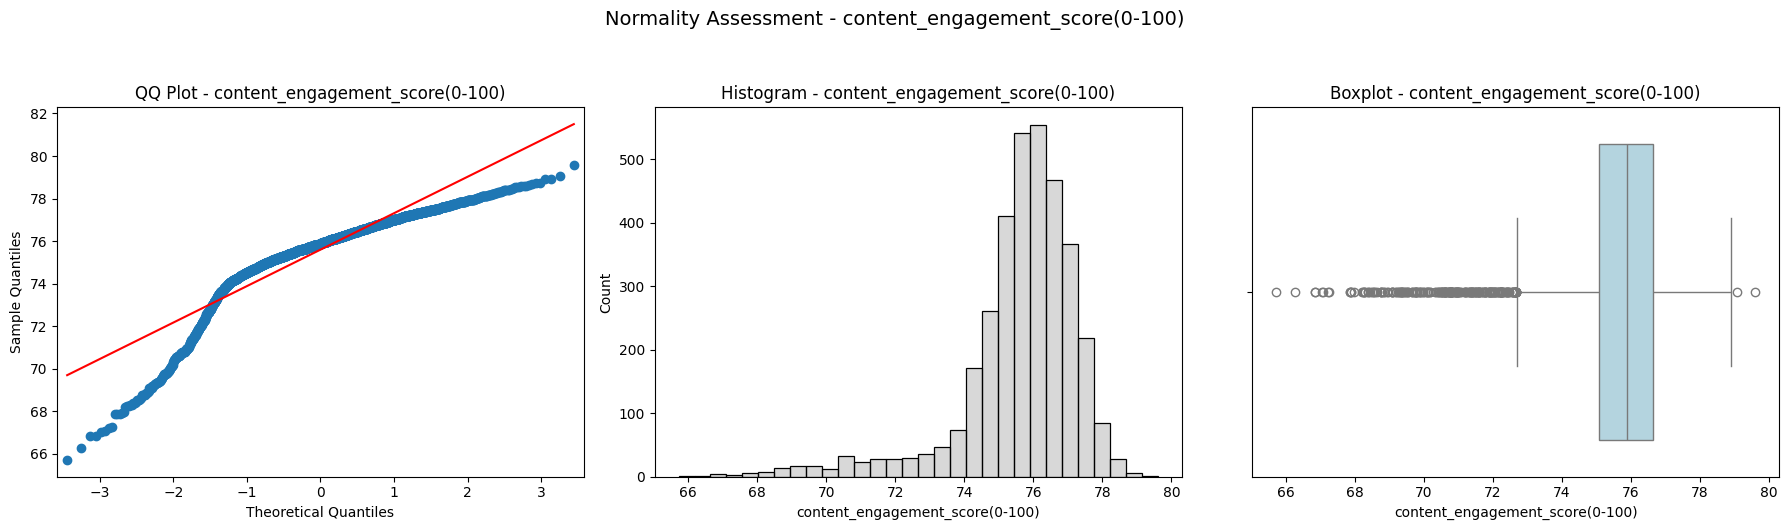

In [ ]:
qd.normcheck_dashboard(df)

# Normality Check:

The Anderson–Darling (AD) test and supporting visualizations were used to assess the normality of each variable. Across all variables, the AD statistic exceeded the corresponding critical value, leading to the rejection of the null hypothesis of normality. Visual assessments further confirm the presence of non-normal distribution patterns.

* Server Cost: The AD statistic of 9.1121 exceeds the critical value, indicating non-normality. The Q–Q plot shows points that generally follow the diagonal, though slight S-shaped deviations and tail departures are visible. The histogram exhibits a roughly bell-shaped form but lacks perfect symmetry. Overall, despite minor visual similarities to a normal distribution, the AD test confirms that the variable is not normally distributed.
* Video Load Times: The AD statistic is higher than the critical value, leading to rejection of normality. The histogram approximates a bell curve, with a central peak, yet deviations remain. The boxplot is highly symmetrical, with balanced whiskers, though outliers exist on both sides. Despite these visual cues, the AD test indicates that the distribution is not normal.
* Average Viewing Time: The AD statistic once again exceeds the critical value, confirming non-normality. The histogram shows a slightly right-skewed, bell-like distribution. The boxplot appears fairly symmetrical, with the median centered. Even with these features, the formal test concludes that the data is not normally distributed.
* Concurrent Users: With the AD statistic surpassing the critical value, normality is rejected. The histogram clearly shows strong right skewness, with a long right tail. The boxplot reflects this pattern, with the median positioned left of center, a long upper whisker, and numerous right-side outliers.
* Subtitle Accuracy: The AD statistic indicates rejection of normality. The histogram displays a sharp, narrow peak concentrated near the upper range, confirming a non-normal pattern. The boxplot shows a short box with a long left whisker and many outliers, demonstrating a pronounced left skew.
* Buffer Events per Session: The AD statistic again leads to rejection of normality. The histogram is extremely right-skewed, with most values concentrated near zero. The boxplot appears largely symmetrical but reflects the same right-skewed tail and presence of outliers.
* Mobile Error Rate: Normality is rejected based on the AD statistic. The histogram is distinctly multimodal, with multiple peaks rather than a single central one. The boxplot remains fairly symmetrical despite these irregularities, further indicating non-normality.
* Content Engagement: The AD statistic exceeds the critical value, confirming non-normality. The histogram reveals a sharp peak with a narrow spread, while the boxplot shows a longer left whisker and several outliers, suggesting a left-skewed distribution and concentration of values in a tight range.




# Method Used: Spearman Correlation
CORRELATION ANALYSIS

                                 concurrent_users  buffer_events_per_session  \
concurrent_users                         1.000000                   0.273384   
buffer_events_per_session                0.273384                   1.000000   
mobile_error_rate(proportion)            0.007325                   0.025067   
video_load_time(seconds)                 0.296516                   0.177396   
subtitle_accuracy_score(0-1)             0.013369                   0.003336   
average_viewing_time(hours)             -0.118941                  -0.232247   
server_cost(in USD)                      0.429093                   0.241315   
content_engagement_score(0-100)         -0.224922                  -0.141050   

                                 mobile_error_rate(proportion)  \
concurrent_users                                      0.007325   
buffer_events_per_session                             0.025067   
mobile_error_rate(proportion)                         1.000000   
video_load_time

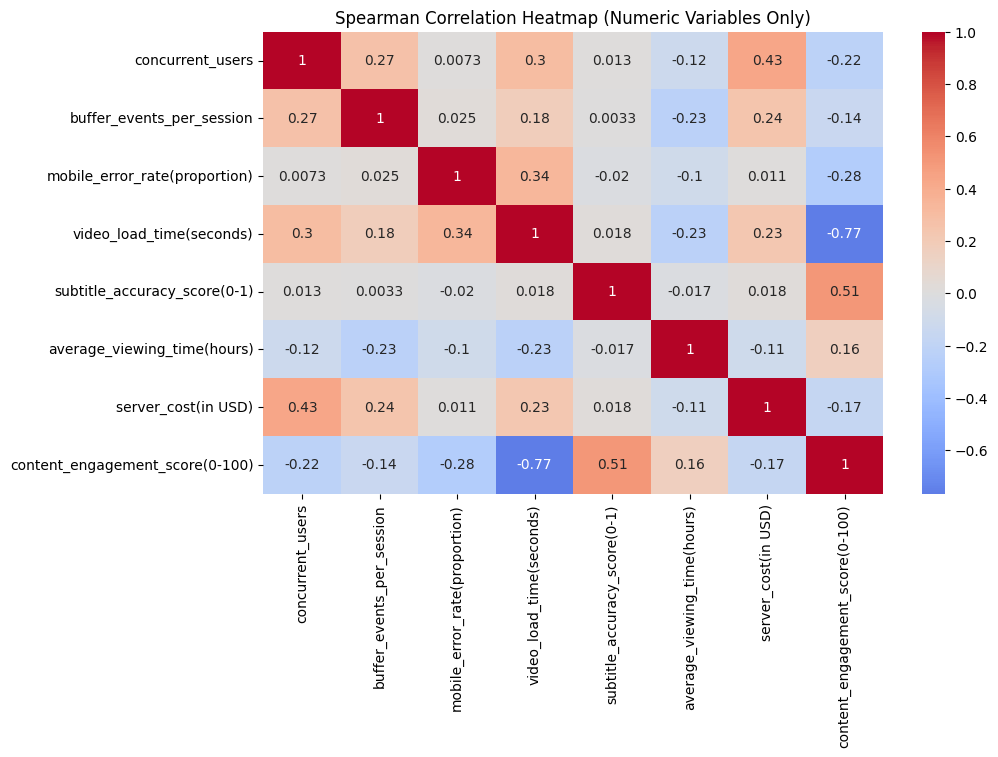

In [ ]:
# 1. Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# 2. Compute Spearman correlation
spearman_corr = numeric_df.corr(method='spearman')

# 3. Display matrix
print(spearman_corr)

# 4. Visualize heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap (Numeric Variables Only)")
plt.show()


In [ ]:
# Rank correlations with content engagement
target = "content_engagement_score(0-100)"

# Sort correlations with the target variable
corr_rank = spearman_corr[target].sort_values(ascending=False)

print("Correlation ranking with", target)
print(corr_rank)


Correlation ranking with content_engagement_score(0-100)
content_engagement_score(0-100)    1.000000
subtitle_accuracy_score(0-1)       0.513130
average_viewing_time(hours)        0.163598
buffer_events_per_session         -0.141050
server_cost(in USD)               -0.167747
concurrent_users                  -0.224922
mobile_error_rate(proportion)     -0.279150
video_load_time(seconds)          -0.766026
Name: content_engagement_score(0-100), dtype: float64


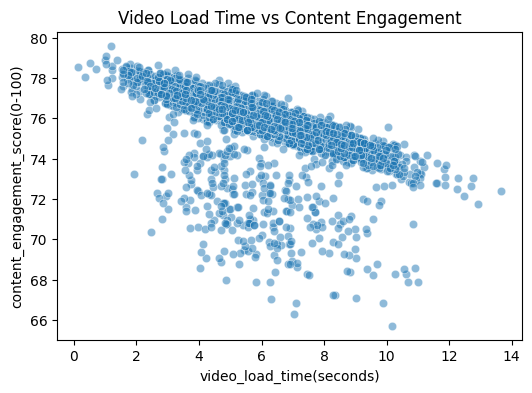

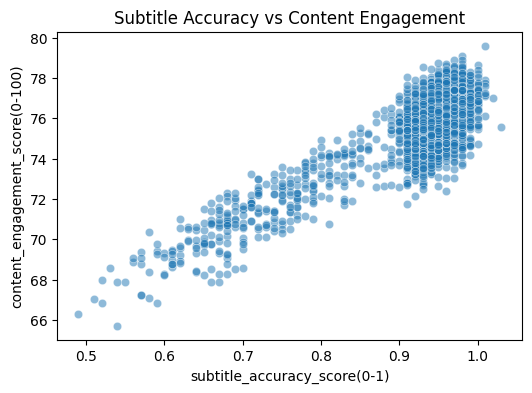

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="video_load_time(seconds)", y=target, data=df, alpha=0.5)
plt.title("Video Load Time vs Content Engagement")
plt.show()

# Scatterplot: subtitle accuracy vs content engagement
plt.figure(figsize=(6,4))
sns.scatterplot(x="subtitle_accuracy_score(0-1)", y=target, data=df, alpha=0.5)
plt.title("Subtitle Accuracy vs Content Engagement")
plt.show()

In [ ]:
engagement = "content_engagement_score(0-100)"
load_time = "video_load_time(seconds)"
buffer_events = "buffer_events_per_session"
mobile_error = "mobile_error_rate(proportion)"
subtitle_acc = "subtitle_accuracy_score(0-1)"
viewing_time = "average_viewing_time(hours)"
server_cost = "server_cost(in USD)"
concurrent_users = "concurrent_users"

Correlation with Engagement:
video_load_time(seconds)          -0.766026
buffer_events_per_session         -0.141050
mobile_error_rate(proportion)     -0.279150
content_engagement_score(0-100)    1.000000
Name: content_engagement_score(0-100), dtype: float64


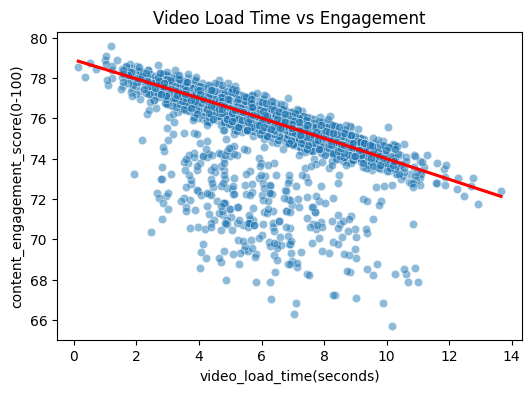

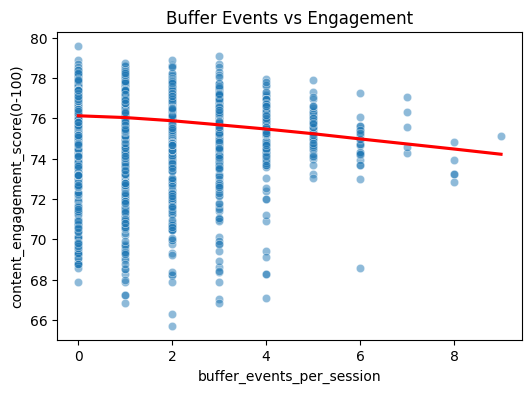

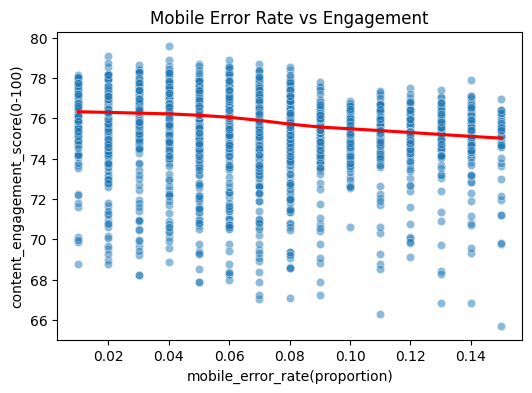

In [ ]:
print("Correlation with Engagement:")
print(df[[load_time, buffer_events, mobile_error, engagement]].corr(method='spearman')[engagement])

# 2. Visuals
plt.figure(figsize=(6,4))
sns.scatterplot(x=load_time, y=engagement, data=df, alpha=0.5)
sns.regplot(x=load_time, y=engagement, data=df, scatter=False, color='red', lowess=True)
plt.title("Video Load Time vs Engagement")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=buffer_events, y=engagement, data=df, alpha=0.5)
sns.regplot(x=buffer_events, y=engagement, data=df, scatter=False, color='red', lowess=True)
plt.title("Buffer Events vs Engagement")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=mobile_error, y=engagement, data=df, alpha=0.5)
sns.regplot(x=mobile_error, y=engagement, data=df, scatter=False, color='red', lowess=True)
plt.title("Mobile Error Rate vs Engagement")
plt.show()

Analysis:

* Video Load Time vs. Engagement: The scatterplot shows a clear downward trend, indicating that user engagement decreases as video load times increase. This suggests that longer loading durations negatively affect user interest and viewing behavior.
* Buffer Events vs. Engagement: A downward slope is also observed between buffer events and engagement, though the decline is more gradual. This implies that while buffering does reduce engagement, its impact is less severe compared to load times.
* Mobile Error Rate vs. Engagement: The relationship displays a slight negative slope, meaning higher mobile error rates correspond with reduced engagement levels. Users experiencing frequent mobile errors tend to interact less with the platform.









Correlation between Subtitle Accuracy and Engagement:
subtitle_accuracy_score(0-1)       0.51313
content_engagement_score(0-100)    1.00000
Name: content_engagement_score(0-100), dtype: float64


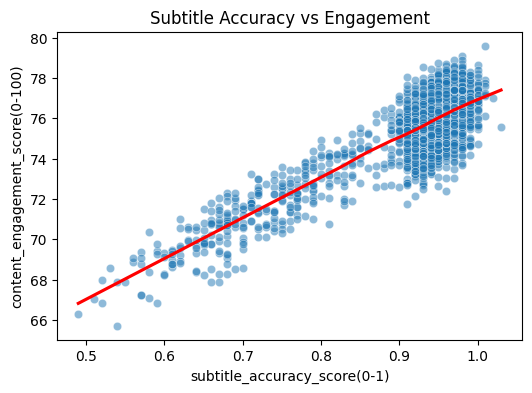

In [ ]:
# Correlation value
print("Correlation between Subtitle Accuracy and Engagement:")
print(df[[subtitle_acc, engagement]].corr(method='spearman')[engagement])

# Visual
plt.figure(figsize=(6,4))
sns.scatterplot(x=subtitle_acc, y=engagement, data=df, alpha=0.5)
sns.regplot(x=subtitle_acc, y=engagement, data=df, scatter=False, color='red', lowess=True)
plt.title("Subtitle Accuracy vs Engagement")
plt.show()

Analysis:

Subtitle VS Engagement - Upward Slope, meaning the higher the subtitle accuracy, the higher the engagement.

Correlations with Server Cost:
concurrent_users             0.429093
buffer_events_per_session    0.241315
video_load_time(seconds)     0.229704
server_cost(in USD)          1.000000
Name: server_cost(in USD), dtype: float64


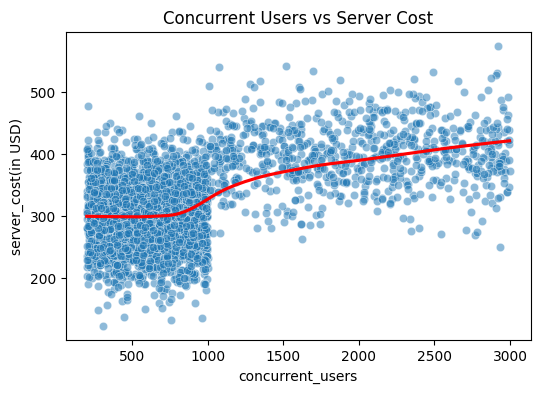

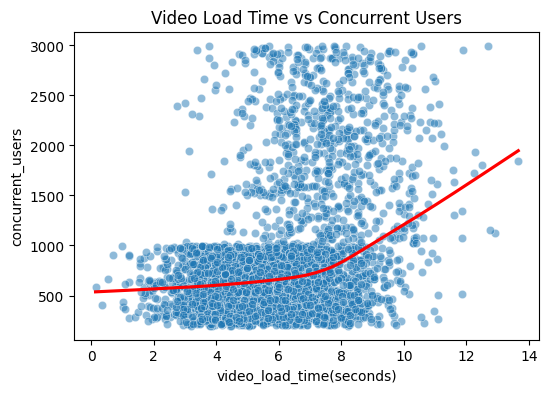

In [ ]:
# Correlations
print("Correlations with Server Cost:")
print(df[[concurrent_users, buffer_events, load_time, server_cost]].corr(method='spearman')[server_cost])

# Visuals
plt.figure(figsize=(6,4))
sns.scatterplot(x=concurrent_users, y=server_cost, data=df, alpha=0.5)
sns.regplot(x=concurrent_users, y=server_cost, data=df, scatter=False, color='red', lowess=True)
plt.title("Concurrent Users vs Server Cost")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=load_time, y=concurrent_users, data=df, alpha=0.5)
sns.regplot(x=load_time, y=concurrent_users, data=df, scatter=False, color='red', lowess=True)
plt.title("Video Load Time vs Concurrent Users")
plt.show()
